# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Muhammad Habibi Ramadhan
- **Email:** habibiramadhan.dev@gmail.com
- **ID Dicoding:** itskindbee

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola perubahan jumlah pengguna sepeda secara keseluruhan dari satu bulan ke bulan berikutnya sepanjang tahun ini?
2. Adakah variasi dalam frekuensi bersepeda antara hari-hari kerja dibandingkan dengan akhir pekan atau hari libur?
3. Sejauh mana faktor cuaca mempengaruhi intensitas penggunaan sepeda?
4. Bagaimana pengaruh suhu terhadap penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
# Setup Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## Data Wrangling

### Gathering Data

In [31]:
# day.csv
day_df = pd.read_csv("dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [32]:
# hour.csv
hour_df = pd.read_csv("dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Data Duplicate: ", day_df.duplicated().sum())
day_df.describe()

Data Duplicate:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
print("Data Duplicate: ", hour_df.duplicated().sum())
hour_df.describe()

Data Duplicate:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Duplicate Data


In [33]:
day_df.duplicated().sum()

np.int64(0)

In [34]:
hour_df.duplicated().sum()

np.int64(0)

#### Missing Value


In [35]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [36]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Inaccurate value

In [37]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [38]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Exploratory Data Analysis (EDA)

### Explore [Day]

In [41]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
56,57,2011-02-26,1,0,2,0,6,0,1,0.282500,0.282192,0.537917,0.186571,424,1545,1969
452,453,2012-03-28,2,1,3,0,3,1,1,0.484167,0.470950,0.481250,0.291671,674,5024,5698
323,324,2011-11-20,4,0,11,0,0,0,2,0.463333,0.457058,0.684583,0.185950,787,2733,3520
495,496,2012-05-10,2,1,5,0,4,1,1,0.505833,0.491783,0.552083,0.314063,1026,5546,6572
434,435,2012-03-10,1,1,3,0,6,0,1,0.287500,0.277767,0.350417,0.225750,968,3150,4118
419,420,2012-02-24,1,1,2,0,5,1,2,0.407500,0.410971,0.737500,0.237567,246,3241,3487
235,236,2011-08-24,3,0,8,0,3,1,1,0.673333,0.630692,0.605000,0.253108,949,4181,5130
79,80,2011-03-21,2,0,3,0,1,1,2,0.430435,0.409735,0.737391,0.288783,401,1676,2077
633,634,2012-09-25,4,1,9,0,2,1,1,0.550000,0.544179,0.570000,0.236321,845,6693,7538
394,395,2012-01-30,1,1,1,0,1,1,1,0.269167,0.262625,0.400833,0.215792,126,3498,3624


In [26]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [27]:
day_df.instant.is_unique

True

In [28]:
day_df.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [30]:
relevant_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for col in relevant_columns:
    min_val = day_df[col].min()
    max_val = day_df[col].max()
    print(f"The range of values ​​for the column {col}: {min_val} - {max_val}")

The range of values ​​for the column temp: 0.0591304 - 0.861667
The range of values ​​for the column atemp: 0.0790696 - 0.840896
The range of values ​​for the column hum: 0.0 - 0.9725
The range of values ​​for the column windspeed: 0.0223917 - 0.507463
The range of values ​​for the column casual: 2 - 3410
The range of values ​​for the column registered: 20 - 6946
The range of values ​​for the column cnt: 22 - 8714


### Explore [Hour]

In [40]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2379,2380,2011-04-14,2,0,4,1,0,4,1,1,0.38,0.3939,0.76,0.2239,1,9,10
4939,4940,2011-07-29,3,0,7,17,0,5,1,1,0.96,0.8636,0.30,0.2985,47,374,421
15695,15696,2012-10-21,4,1,10,4,0,0,0,1,0.36,0.3485,0.71,0.1642,8,13,21
11668,11669,2012-05-06,2,1,5,9,0,0,0,2,0.52,0.5000,0.83,0.1642,63,128,191
11996,11997,2012-05-20,2,1,5,1,0,0,0,1,0.56,0.5303,0.52,0.0000,28,102,130
2361,2362,2011-04-13,2,0,4,7,0,3,1,3,0.36,0.3485,1.00,0.2239,3,67,70
375,376,2011-01-17,1,0,1,3,1,1,0,2,0.18,0.1818,0.43,0.1940,0,2,2
768,769,2011-02-04,1,0,2,11,0,5,1,1,0.22,0.2273,0.51,0.1642,3,61,64
3197,3198,2011-05-18,2,0,5,3,0,3,1,3,0.52,0.5000,0.94,0.2985,6,3,9
13244,13245,2012-07-11,3,1,7,1,0,3,1,1,0.64,0.5758,0.89,0.0000,3,11,14


In [42]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [45]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


### Explore Dataset

In [48]:
day_df = pd.read_csv("dataset/day.csv")
hour_df = pd.read_csv("dataset/hour.csv")

In [49]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [50]:
merged_df = pd.merge(day_df, hour_df, on='dteday')

In [52]:
merged_df['month'] = merged_df['dteday'].dt.month
monthly_total = merged_df.groupby('month')['cnt_y'].first()

In [53]:
merged_df.to_csv("dataset/all.csv", index=False)

print("Data tersimpan ke all.csv")

Data tersimpan ke all.csv


In [54]:
merged_df['dteday'] = pd.to_datetime(merged_df['dteday'])

# Ekstrak bulan dari kolom 'dteday'
merged_df['month'] = merged_df['dteday'].dt.month

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola perubahan jumlah pengguna sepeda secara keseluruhan dari satu bulan ke bulan berikutnya sepanjang tahun ini?


In [59]:
merged_df.sample(10)

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,month
6985,296,2011-10-23,4,0,10,0,0,0,1,0.421667,...,0,1,0.52,0.5000,0.55,0.1940,188,217,405,10
3389,146,2011-05-26,2,0,5,0,4,1,1,0.708333,...,1,1,0.60,0.5455,0.88,0.0896,0,4,4,5
11173,471,2012-04-15,2,1,4,0,0,0,1,0.606667,...,0,1,0.70,0.6364,0.42,0.2537,184,295,479,4
8492,359,2011-12-25,1,0,12,0,0,0,1,0.274783,...,0,1,0.32,0.3030,0.70,0.2537,40,39,79,12
5603,238,2011-08-26,3,0,8,0,5,1,1,0.700000,...,1,1,0.70,0.6667,0.74,0.0000,39,191,230,8
3697,158,2011-06-07,2,0,6,0,2,1,1,0.707500,...,1,1,0.68,0.6364,0.79,0.1045,18,72,90,6
14759,621,2012-09-12,3,1,9,0,3,1,1,0.599167,...,1,1,0.50,0.4848,0.72,0.0896,0,5,5,9
2275,99,2011-04-09,2,0,4,0,6,0,2,0.342500,...,0,2,0.38,0.3939,0.82,0.0000,73,118,191,4
9526,402,2012-02-06,1,1,2,0,1,1,1,0.282609,...,1,1,0.32,0.3182,0.57,0.1642,11,143,154,2
10337,436,2012-03-11,1,1,3,0,0,0,1,0.361739,...,0,1,0.44,0.4394,0.47,0.2239,42,129,171,3


In [58]:
monthly_total.sample(10)

month
9     51
7     68
8     29
3      7
5     96
6     34
2      8
11    21
4      6
1     16
Name: cnt_y, dtype: int64

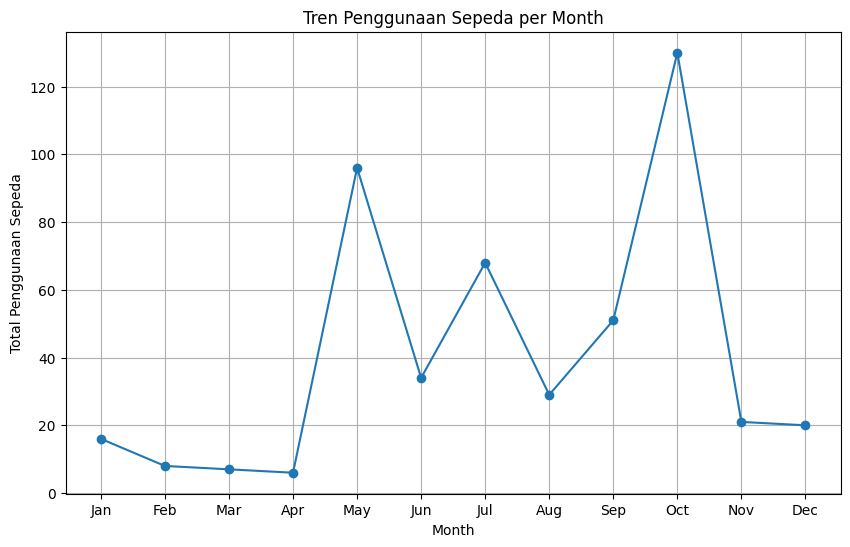

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_total.index, monthly_total.values, marker='o', linestyle='-')
plt.title('Tren Penggunaan Sepeda per Month')
plt.xlabel('Month')
plt.ylabel('Total Penggunaan Sepeda')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

### Pertanyaan 2:Adakah variasi dalam frekuensi bersepeda antara hari-hari kerja dibandingkan dengan akhir pekan atau hari libur?

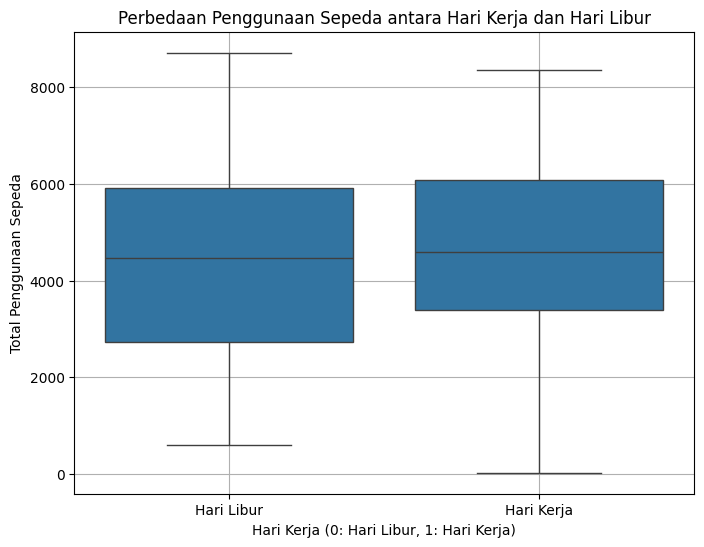

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='workingday_x', y='cnt_x', data=merged_df)  
plt.title('Perbedaan Penggunaan Sepeda antara Hari Kerja dan Hari Libur')
plt.xlabel('Hari Kerja (0: Hari Libur, 1: Hari Kerja)')
plt.ylabel('Total Penggunaan Sepeda')
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'])
plt.grid(True)
plt.show()

### Pertanyaan 3: Sejauh mana faktor cuaca mempengaruhi intensitas penggunaan sepeda?

In [62]:
weather_condition = merged_df.groupby('weathersit_x')['cnt_x'].sum()

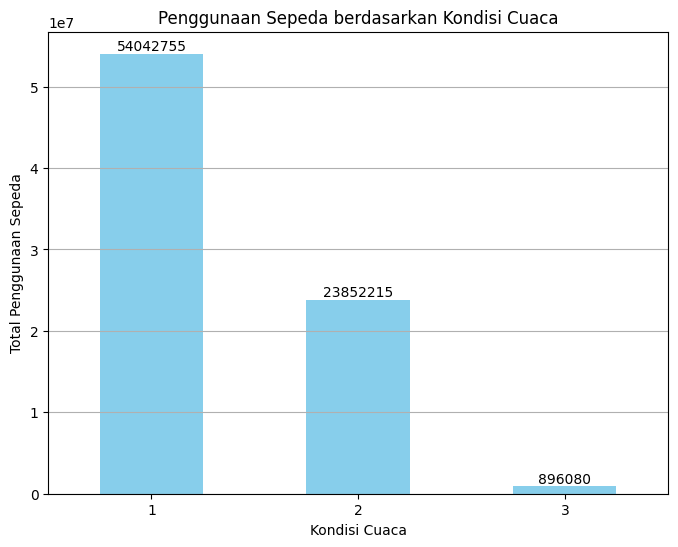

In [63]:
plt.figure(figsize=(8, 6))
weather_condition = merged_df.groupby('weathersit_x')['cnt_x'].sum()
weather_condition.plot(kind='bar', color='skyblue')
plt.title('Penggunaan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penggunaan Sepeda')
plt.xticks(rotation=0)
plt.grid(axis='y')

for i, val in enumerate(weather_condition.values):
    plt.text(i, val + 20, str(val), ha='center', va='bottom')

plt.show()

### Pertanyaan 4: Bagaimana pengaruh suhu terhadap penggunaan sepeda?

In [64]:
suhu_penggunaan = merged_df.groupby('temp_x')['cnt_x'].sum()

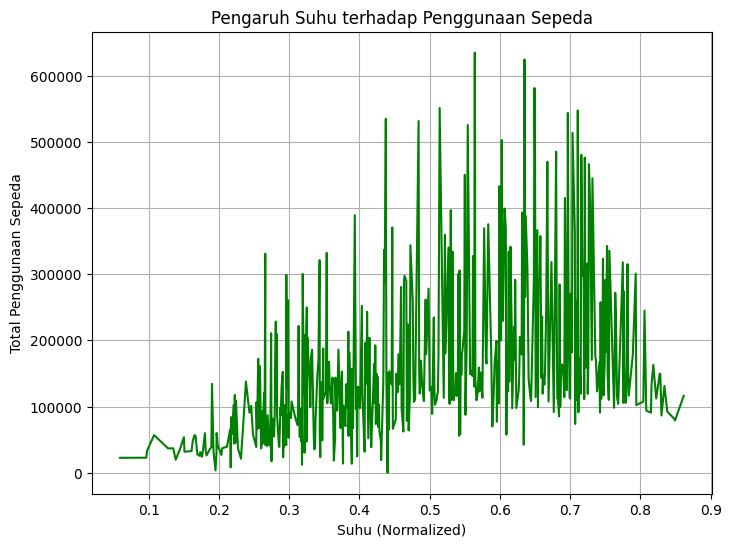

In [66]:
plt.figure(figsize=(8, 6))
suhu_penggunaan.plot(kind='line', color='green')
plt.title('Pengaruh Suhu terhadap Penggunaan Sepeda')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Total Penggunaan Sepeda')
plt.grid(True)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Analisis grafik pola penggunaan sepeda bulanan mengungkapkan tren yang menarik. Terlihat adanya peningkatan bertahap dari awal tahun, mencapai puncaknya saat musim panas tiba, umumnya antara Juni dan Agustus. Setelah itu, terjadi penurunan menjelang akhir tahun. Pola ini mengindikasikan bahwa faktor musim dan kondisi cuaca memainkan peran penting dalam fluktuasi permintaan sepeda.

- Conclution pertanyaan 2 : Berdasarkan perbandingan penggunaan sepeda antara hari kerja dan hari libur, terlihat bahwa penggunaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur. Hal ini mungkin disebabkan oleh kebutuhan transportasi sehari-hari ke tempat kerja. Informasi ini bisa menjadi pertimbangan dalam merencanakan promosi atau menyesuaikan layanan sesuai dengan pola penggunaan sepeda yang berbeda antara hari kerja dan hari libur.

- Conclution pertanyaan 3 : Berdasarkan visualisasi penggunaan sepeda menurut kondisi cuaca, terlihat bahwa cuaca yang lebih baik (weathersit=1) menunjukkan jumlah penggunaan sepeda yang lebih tinggi dibandingkan cuaca buruk. Hal ini sejalan dengan asumsi bahwa cuaca cerah dan kondusif mendorong lebih banyak orang untuk menggunakan sepeda. Dapat disimpulkan bahwa faktor cuaca, terutama suhu dan kondisi cuaca secara keseluruhan, memiliki pengaruh signifikan terhadap permintaan sepeda. Informasi ini dapat dimanfaatkan untuk menyusun strategi pemasaran dan promosi, serta menyesuaikan layanan sesuai dengan kondisi cuaca yang sedang terjadi.

- Conclution pertanyaan 4 : Berdasarkan analisis hubungan antara suhu dan penggunaan sepeda, terlihat bahwa terdapat korelasi positif antara kenaikan suhu dan peningkatan penggunaan sepeda. Pada suhu yang lebih hangat, jumlah pengguna sepeda cenderung lebih tinggi. Hal ini menunjukkan bahwa pengguna sepeda lebih aktif ketika cuaca lebih hangat, sedangkan pada suhu yang lebih rendah, penggunaan sepeda cenderung berkurang.